In [1]:
!pip install h5py

In [2]:
''' Loading patches and case_id into variables '''
import h5py
import numpy as np
train = "hdf5_TCGAFFPE_LUAD_5x_perP_he_train.h5"
test = "hdf5_TCGAFFPE_LUAD_5x_perP_he_test.h5"
valid = "hdf5_TCGAFFPE_LUAD_5x_perP_he_validation.h5"
hdf5_train = h5py.File(train, "r")
hdf5_test = h5py.File(test, "r")
hdf5_valid = h5py.File(valid, "r")
dtrain = hdf5_train['train_img']
dtest = hdf5_test['test_img']
dvalid = hdf5_valid['valid_img']
train_slides = hdf5_train['train_slides']
test_slides = hdf5_test['test_slides']
valid_slides = hdf5_valid['valid_slides']


In [3]:
label = valid_slides
label.shape[0]

32783

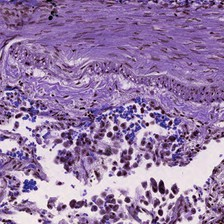

<PIL.Image.Image image mode=RGB size=224x224 at 0x1504EC8ECA0>
(224, 224)
b'TCGA-69-7765-01Z-00-DX1'


In [4]:
''' Patch visualizations '''
import numpy as np
from matplotlib.pyplot import imshow
from torchvision import transforms
im = transforms.ToPILImage()(dtrain[78978]).convert("RGB")
display(im)
print(im)
print(im.size)
print(train_slides[1343])

In [6]:
luad = hdf5_valid['valid_slides']

In [7]:
count = 0
for i in luad:
    if i.decode("utf-8") == 'TCGA-38-4626-01Z-00-DX1':
        count=count+1
print(count)

706


In [12]:
'''  Clinical dataset being filtered for the purpose of survival resulting in 942 unique cases. This will be used to get the appropriate patchesin training and testing sets '''
import pandas as pd
import numpy as np
cols=["case_submitter_id","days_to_birth","days_to_death","vital_status","year_of_birth","year_of_death","age_at_diagnosis","days_to_diagnosis","days_to_last_follow_up","year_of_diagnosis","treatment_or_therapy"]
df = pd.read_csv("clinical.tsv",usecols=cols, sep='\t')
temp1=pd.get_dummies(df["vital_status"])
df2 = pd.concat((df,temp1),axis=1)
df2 = df2.drop(['vital_status'],axis=1)
df2 = df2.drop(['Alive'],axis=1)
df2['Dead'] = df2['Dead'].astype(int)
df2 = df2.drop_duplicates()
df2 = df2.replace("'--", np.nan)
df2['event_data'] = df2['days_to_death']
df2.event_data.fillna(df2.days_to_last_follow_up, inplace=True)
df2 = df2[df2['event_data'].notna()]
df2['duration_months'] = np.round(df2['event_data'].astype(int)/31)
df2['duration_months']=df2['duration_months'].astype(int)
df2=df2.sort_values(["duration_months"], ascending=True)
df3 = df2[['case_submitter_id', 'Dead', 'event_data','duration_months']].copy()
df3.reset_index(drop=True, inplace=True)
df3=df3.drop_duplicates()
len(df3)

942

In [12]:
''' Extracting event observation and event duration data into variables 
    to be used as inputs into the loss function in survival model.
    It is to be noted the "censor" variable actually holds event observation value rather than censorship'''
censor=np.array([-1] * label.shape[0])
event_time=np.array([-1] * label.shape[0])
for i in range(label.shape[0]):
    lab = luad[i].decode("utf-8")[0:12]
    if df3.loc[df3['case_submitter_id'] == lab].empty:
        print(lab)
        continue
    censor[i]=df3.loc[df3['case_submitter_id'] == lab]['Dead']
    event_time[i]=df3.loc[df3['case_submitter_id'] == lab]['event_data']


TCGA-75-6205
TCGA-75-6205
TCGA-75-6205
TCGA-75-6205
TCGA-75-6205
TCGA-75-5122
TCGA-75-6205
TCGA-75-6205
TCGA-75-5122
TCGA-75-6205
TCGA-75-6205
TCGA-75-5122
TCGA-75-6205
TCGA-75-6205
TCGA-75-5122
TCGA-75-5122
TCGA-75-6205
TCGA-75-6205
TCGA-75-5122
TCGA-75-6205
TCGA-75-5122
TCGA-75-6205
TCGA-75-5122
TCGA-75-6205
TCGA-75-6205
TCGA-75-6205
TCGA-75-6205
TCGA-75-6205
TCGA-75-6205
TCGA-75-6205
TCGA-75-6205
TCGA-75-5122
TCGA-75-6205
TCGA-75-6205
TCGA-75-6205
TCGA-75-6205
TCGA-75-6205
TCGA-75-5122
TCGA-75-6205
TCGA-75-5122
TCGA-75-6205
TCGA-75-6205
TCGA-75-6205
TCGA-75-6205
TCGA-75-6205
TCGA-75-6205
TCGA-75-6205
TCGA-75-6205
TCGA-75-6205
TCGA-75-6205
TCGA-75-5122
TCGA-75-6205
TCGA-75-5122
TCGA-75-5122
TCGA-75-6205
TCGA-75-6205
TCGA-75-5122
TCGA-75-5122
TCGA-75-5122
TCGA-75-6205
TCGA-75-5122
TCGA-75-6205
TCGA-75-6205
TCGA-75-6205
TCGA-75-5122
TCGA-75-5122
TCGA-75-5122
TCGA-75-6205
TCGA-75-5122
TCGA-75-5122
TCGA-75-5122
TCGA-75-6205
TCGA-75-6205
TCGA-75-6205
TCGA-75-5122
TCGA-75-5122
TCGA-75-6205

TCGA-75-6203
TCGA-75-6203
TCGA-75-6203
TCGA-75-6203
TCGA-75-6203
TCGA-75-6203
TCGA-75-6203
TCGA-75-6203
TCGA-75-6203
TCGA-75-6203
TCGA-75-6203
TCGA-75-6203
TCGA-75-6203
TCGA-75-6203
TCGA-75-6203
TCGA-75-6203
TCGA-75-6203
TCGA-75-6203
TCGA-75-6203
TCGA-75-6203
TCGA-75-6203
TCGA-75-6203
TCGA-75-6203
TCGA-75-6203
TCGA-75-6203
TCGA-75-6203
TCGA-75-6203
TCGA-75-6203
TCGA-75-6203
TCGA-75-6203
TCGA-75-6203
TCGA-75-6203
TCGA-75-6203
TCGA-75-6203
TCGA-75-6203


In [13]:
import torch
censor=torch.FloatTensor(censor)
event_time=torch.FloatTensor(event_time)

In [15]:
torch.save(censor,"valid_censor_1.pt")
torch.save(event_time,"valid_et_1.pt")


In [16]:
import torch
cen=torch.load("valid_censor_1.pt")
print(cen[:20])
et=torch.load("valid_et_1.pt")
print(et[-3:])


tensor([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])
tensor([468., 375., 568.])


In [62]:
main_store[0]

tensor([ 0.6871, 16.9310,  0.6528,  ...,  2.0662,  2.6203,  3.5808],
       device='cuda:0')

In [12]:
''' Extracting event observation and event duration data into variables combining train and validation files
    to be used as inputs into the loss function in survival model.
    It is to be noted the "censor" variable actually holds event observation value rather than censorship'''
censor=np.array([-1] * 179709) # 146926
event_time=np.array([-1] * 179709) #32783
#censor=np.zeros(label.shape[0])
#event_time=np.zeros(label.shape[0])
for i in range(179709):
    if i < 146926:
        lab = train_slides[i].decode("utf-8")[0:12]
    else:
        lab = valid_slides[i-146926].decode("utf-8")[0:12]
    if df3.loc[df3['case_submitter_id'] == lab].empty:
        print(lab)
        continue
    censor[i]=df3.loc[df3['case_submitter_id'] == lab]['Dead']
    event_time[i]=df3.loc[df3['case_submitter_id'] == lab]['event_data']

TCGA-75-6211
TCGA-75-6211
TCGA-75-6211
TCGA-75-6211
TCGA-75-6211
TCGA-75-6211
TCGA-75-6211
TCGA-75-6211
TCGA-75-6211
TCGA-75-6211
TCGA-75-6211
TCGA-75-6211
TCGA-75-6211
TCGA-75-6211
TCGA-75-6211
TCGA-75-6211
TCGA-75-6211
TCGA-75-6211
TCGA-75-6211
TCGA-75-6211
TCGA-75-6211
TCGA-75-6211
TCGA-75-6211
TCGA-75-6211
TCGA-75-6211
TCGA-75-6211
TCGA-75-6211
TCGA-75-6211
TCGA-75-6211
TCGA-75-6211
TCGA-75-6211
TCGA-75-6211
TCGA-75-6211
TCGA-75-6211
TCGA-75-6211
TCGA-75-6211
TCGA-75-6211
TCGA-75-6211
TCGA-75-6211
TCGA-75-6211
TCGA-75-6211
TCGA-75-6211
TCGA-75-6211
TCGA-75-6211
TCGA-75-6211
TCGA-75-6211
TCGA-75-6211
TCGA-75-6211
TCGA-75-6211
TCGA-75-6211
TCGA-75-6211
TCGA-75-5126
TCGA-75-5126
TCGA-75-5126
TCGA-75-5126
TCGA-75-5126
TCGA-75-5126
TCGA-75-5126
TCGA-75-5126
TCGA-75-5126
TCGA-75-5126
TCGA-75-5126
TCGA-75-5126
TCGA-75-5126
TCGA-75-5126
TCGA-75-5126
TCGA-75-5126
TCGA-75-5126
TCGA-75-5126
TCGA-75-5126
TCGA-75-5126
TCGA-75-5126
TCGA-75-5126
TCGA-75-5126
TCGA-75-5126
TCGA-75-5126
TCGA-75-5126

TCGA-75-5126
TCGA-75-5126
TCGA-75-5126
TCGA-75-5126
TCGA-75-5126
TCGA-75-5126
TCGA-75-5126
TCGA-75-5126
TCGA-75-5126
TCGA-75-5126
TCGA-75-5126
TCGA-75-5126
TCGA-75-5126
TCGA-75-5126
TCGA-75-5126
TCGA-75-5126
TCGA-75-5126
TCGA-75-5126
TCGA-75-5126
TCGA-75-5126
TCGA-75-5126
TCGA-75-5126
TCGA-75-5126
TCGA-75-5126
TCGA-75-5126
TCGA-75-5126
TCGA-75-5126
TCGA-75-5126
TCGA-75-5126
TCGA-75-5126
TCGA-75-5126
TCGA-75-5126
TCGA-75-5126
TCGA-75-5126
TCGA-75-5126
TCGA-75-5126
TCGA-75-5126
TCGA-75-5126
TCGA-75-5126
TCGA-75-5126
TCGA-75-5126
TCGA-75-5126
TCGA-75-5126
TCGA-75-5126
TCGA-75-5126
TCGA-75-5126
TCGA-75-5126
TCGA-75-5126
TCGA-75-5126
TCGA-75-5126
TCGA-75-5126
TCGA-75-5126
TCGA-75-5126
TCGA-75-5126
TCGA-75-5126
TCGA-75-5126
TCGA-75-5126
TCGA-75-5126
TCGA-75-5126
TCGA-75-5126
TCGA-75-5126
TCGA-75-5126
TCGA-75-5126
TCGA-75-5126
TCGA-75-5126
TCGA-75-5126
TCGA-75-5126
TCGA-75-5126
TCGA-75-5126
TCGA-75-5126
TCGA-75-5126
TCGA-75-5126
TCGA-75-5126
TCGA-75-5126
TCGA-75-5126
TCGA-75-5126
TCGA-75-5126

TCGA-80-5607
TCGA-75-7030
TCGA-80-5607
TCGA-80-5607
TCGA-80-5607
TCGA-80-5607
TCGA-80-5607
TCGA-75-7030
TCGA-80-5607
TCGA-80-5607
TCGA-80-5607
TCGA-80-5607
TCGA-75-7030
TCGA-80-5607
TCGA-80-5607
TCGA-80-5607
TCGA-80-5607
TCGA-80-5607
TCGA-75-7030
TCGA-80-5607
TCGA-75-7030
TCGA-80-5607
TCGA-75-7030
TCGA-80-5607
TCGA-75-7030
TCGA-80-5607
TCGA-80-5607
TCGA-80-5607
TCGA-75-7030
TCGA-75-7030
TCGA-80-5607
TCGA-80-5607
TCGA-75-7030
TCGA-75-7030
TCGA-80-5607
TCGA-80-5607
TCGA-80-5607
TCGA-75-7030
TCGA-75-7030
TCGA-75-7030
TCGA-75-7030
TCGA-80-5607
TCGA-75-7030
TCGA-75-7030
TCGA-75-7030
TCGA-75-7030
TCGA-80-5607
TCGA-80-5607
TCGA-75-7030
TCGA-75-7030
TCGA-75-7030
TCGA-80-5607
TCGA-80-5607
TCGA-80-5607
TCGA-75-7030
TCGA-75-7030
TCGA-75-7030
TCGA-80-5607
TCGA-80-5607
TCGA-80-5607
TCGA-75-7030
TCGA-75-7030
TCGA-75-7030
TCGA-80-5607
TCGA-80-5607
TCGA-75-7030
TCGA-80-5607
TCGA-80-5607
TCGA-80-5607
TCGA-80-5607
TCGA-80-5607
TCGA-75-7030
TCGA-75-7030
TCGA-80-5607
TCGA-75-7030
TCGA-75-7030
TCGA-75-7030

In [16]:
censor[179708]

0

In [18]:
import torch
torch.save(censor, 'train_valid_censor_1.pt')

In [19]:
torch.save(event_time, 'train_valid_et_1.pt')

In [13]:
''' Extracting event observation and event duration data into variables combining train, validation and test files
    to be used as inputs into the loss function in survival model.
    It is to be noted the "censor" variable actually holds event observation value rather than censorship'''
censor=np.array([-1] * 216258)
event_time=np.array([-1] * 216258)
#censor=np.zeros(label.shape[0])
#event_time=np.zeros(label.shape[0])
for i in range(216258):
    if i < 146926:
        lab = train_slides[i].decode("utf-8")[0:12]
    elif i < 183475:
        ix = i-146926
        lab = test_slides[ix].decode("utf-8")[0:12]
    else:
        ix = i - 183475
        lab = valid_slides[ix].decode("utf-8")[0:12]
        
    if df3.loc[df3['case_submitter_id'] == lab].empty:
        print(lab)
        continue
    censor[i]=df3.loc[df3['case_submitter_id'] == lab]['Dead']
    event_time[i]=df3.loc[df3['case_submitter_id'] == lab]['event_data']


TCGA-75-6211
TCGA-75-6211
TCGA-75-6211
TCGA-75-6211
TCGA-75-6211
TCGA-75-6211
TCGA-75-6211
TCGA-75-6211
TCGA-75-6211
TCGA-75-6211
TCGA-75-6211
TCGA-75-6211
TCGA-75-6211
TCGA-75-6211
TCGA-75-6211
TCGA-75-6211
TCGA-75-6211
TCGA-75-6211
TCGA-75-6211
TCGA-75-6211
TCGA-75-6211
TCGA-75-6211
TCGA-75-6211
TCGA-75-6211
TCGA-75-6211
TCGA-75-6211
TCGA-75-6211
TCGA-75-6211
TCGA-75-6211
TCGA-75-6211
TCGA-75-6211
TCGA-75-6211
TCGA-75-6211
TCGA-75-6211
TCGA-75-6211
TCGA-75-6211
TCGA-75-6211
TCGA-75-6211
TCGA-75-6211
TCGA-75-6211
TCGA-75-6211
TCGA-75-6211
TCGA-75-6211
TCGA-75-6211
TCGA-75-6211
TCGA-75-6211
TCGA-75-6211
TCGA-75-6211
TCGA-75-6211
TCGA-75-6211
TCGA-75-6211
TCGA-75-5126
TCGA-75-5126
TCGA-75-5126
TCGA-75-5126
TCGA-75-5126
TCGA-75-5126
TCGA-75-5126
TCGA-75-5126
TCGA-75-5126
TCGA-75-5126
TCGA-75-5126
TCGA-75-5126
TCGA-75-5126
TCGA-75-5126
TCGA-75-5126
TCGA-75-5126
TCGA-75-5126
TCGA-75-5126
TCGA-75-5126
TCGA-75-5126
TCGA-75-5126
TCGA-75-5126
TCGA-75-5126
TCGA-75-5126
TCGA-75-5126
TCGA-75-5126

TCGA-75-5126
TCGA-75-5126
TCGA-75-5126
TCGA-75-5126
TCGA-75-5126
TCGA-75-5126
TCGA-75-5126
TCGA-75-5126
TCGA-75-5126
TCGA-75-5126
TCGA-75-5126
TCGA-75-5126
TCGA-75-5126
TCGA-75-5126
TCGA-75-5126
TCGA-75-5126
TCGA-75-5126
TCGA-75-5126
TCGA-75-5126
TCGA-75-5126
TCGA-75-5126
TCGA-75-5126
TCGA-75-5126
TCGA-75-5126
TCGA-75-5126
TCGA-75-5126
TCGA-75-5126
TCGA-75-5126
TCGA-75-5126
TCGA-75-5126
TCGA-75-5126
TCGA-75-5126
TCGA-75-5126
TCGA-75-5126
TCGA-75-5126
TCGA-75-5126
TCGA-75-5126
TCGA-75-5126
TCGA-75-5126
TCGA-75-5126
TCGA-75-5126
TCGA-75-5126
TCGA-75-5126
TCGA-75-5126
TCGA-75-5126
TCGA-75-5126
TCGA-75-5126
TCGA-75-5126
TCGA-75-5126
TCGA-75-5126
TCGA-75-5126
TCGA-75-5126
TCGA-75-5126
TCGA-75-5126
TCGA-75-5126
TCGA-75-5126
TCGA-75-5126
TCGA-75-5126
TCGA-75-5126
TCGA-75-5126
TCGA-75-5126
TCGA-75-5126
TCGA-75-5126
TCGA-75-5126
TCGA-75-5126
TCGA-75-5126
TCGA-75-5126
TCGA-75-5126
TCGA-75-5126
TCGA-75-5126
TCGA-75-5126
TCGA-75-5126
TCGA-75-5126
TCGA-75-5126
TCGA-75-5126
TCGA-75-5126
TCGA-75-5126

TCGA-75-5122
TCGA-75-5122
TCGA-75-6205
TCGA-75-6205
TCGA-75-6205
TCGA-75-6205
TCGA-75-5122
TCGA-75-6205
TCGA-75-6205
TCGA-75-5122
TCGA-75-5122
TCGA-75-6205
TCGA-75-5122
TCGA-75-6205
TCGA-75-5122
TCGA-75-6205
TCGA-75-6205
TCGA-75-6205
TCGA-75-5122
TCGA-75-6205
TCGA-75-6205
TCGA-75-6205
TCGA-75-6205
TCGA-75-5122
TCGA-75-6205
TCGA-75-6205
TCGA-75-6205
TCGA-75-6205
TCGA-75-6205
TCGA-75-6205
TCGA-75-6205
TCGA-75-5122
TCGA-75-6205
TCGA-75-5122
TCGA-75-5122
TCGA-75-6205
TCGA-75-6205
TCGA-75-6205
TCGA-75-6205
TCGA-75-6205
TCGA-75-5122
TCGA-75-6205
TCGA-75-6205
TCGA-75-6205
TCGA-75-6205
TCGA-75-6205
TCGA-75-6205
TCGA-75-6205
TCGA-75-6205
TCGA-75-5122
TCGA-75-5122
TCGA-75-5122
TCGA-75-6205
TCGA-75-6205
TCGA-75-6205
TCGA-75-6205
TCGA-75-5122
TCGA-75-6205
TCGA-75-6205
TCGA-75-6205
TCGA-75-6205
TCGA-75-6205
TCGA-75-6205
TCGA-75-6205
TCGA-75-5122
TCGA-75-6205
TCGA-75-5122
TCGA-75-6205
TCGA-75-6205
TCGA-75-6205
TCGA-75-5122
TCGA-75-5122
TCGA-75-5122
TCGA-75-6205
TCGA-75-5122
TCGA-75-6205
TCGA-75-5122

In [15]:
torch.save(censor,"total_censor_1.pt")
torch.save(event_time,"total_et_1.pt")